

![Intro Image](Images/ai_cv_intro.png)
# **Visão Artificial** - Sistemas de Visão e Perceção
# <span style="background-image: linear-gradient(to right, #ff0080, #8000ff); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Tiago Padilha</span>


### **Computer Vision** é um domínio da **inteligência artificial** que permite a computadores **interpretar e tomar decisões** com base em **dados visuais**, mesmo em **ambientes dinâmicos**.  🚀

### Esta capacidade permite revolucionar as indústrias e melhorar a interação humana com a tecnologia. 🤖👨‍💻



## **3 - Pré Processamento e Segmentação**

- A aquisição de uma imagem é uma das primeiras etapas a realizar, em conjunto com sucessivas técnicas de pré-processamento.

---

#### Ler uma imagem e criar o seu histograma
Um histograma é uma representação gráfica da distribuição de intensidades de uma imagem. É uma ferramenta útil para a análise de contraste e brilho de uma imagem.

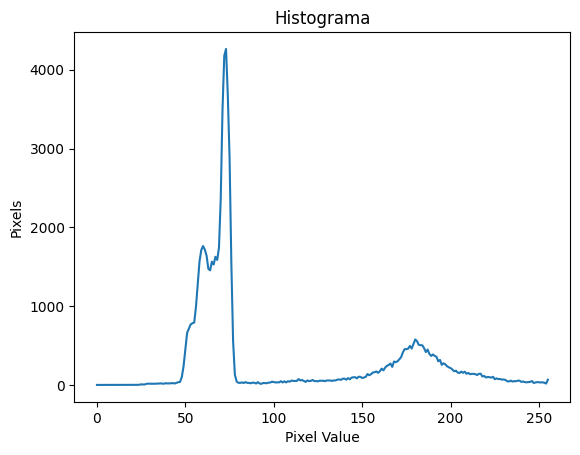

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"Images\coins.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Pixels')
plt.title('Histograma')
plt.show()


#### Binarização de uma imagem

Como podemos binarizar uma imagem através de um threshold?

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"Images\coins.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_value = 100
max_value = 256

blur_image = cv2.GaussianBlur(gray_image, (5,5), cv2.BORDER_DEFAULT)

_ , binary_img = cv2.threshold(blur_image, threshold_value, max_value, cv2.THRESH_BINARY) 


cv2.imshow('Binary Image', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Criação de Funções para mostrar imagens

In [1]:
import matplotlib.pyplot as plt


def show_2figures(img1, img2, title1='', title2=''):
    _ , axes = plt.subplots(1, 2, figsize=(10,5))

    axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[0].set_title(title1)
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title2)
    axes[1].axis('off')

    plt.subplots_adjust(wspace=0.1)

def show_3figures(img1, img2, img3, title1='', title2='', title3=''):
    _ , axes = plt.subplots(1, 3, figsize=(16, 12))

    axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[0].set_title(title1)
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title2)
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axes[2].set_title(title3)
    axes[2].axis('off')

    plt.subplots_adjust(wspace=0.1)

#### Função para mostrar um histograma

In [2]:
def histogram_gray(img_hist_gray):

    gray_hist = cv2.calcHist([img_hist_gray], [0], None, [256], [0,256])

    plt.figure()
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Qt. of Pixels')
    plt.plot(gray_hist)
    plt.xlim([0,256])
    plt.show()

#### Visualização de um histograma mais complexo 

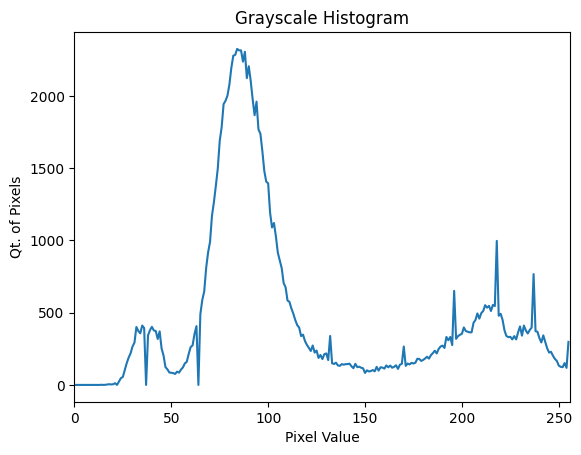

In [8]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"Images\matches.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

histogram_gray(gray_image)
cv2.imshow('Image of a phosphorus', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Como binarizar a imagem considerando apenas a cabeça dos fósforos?

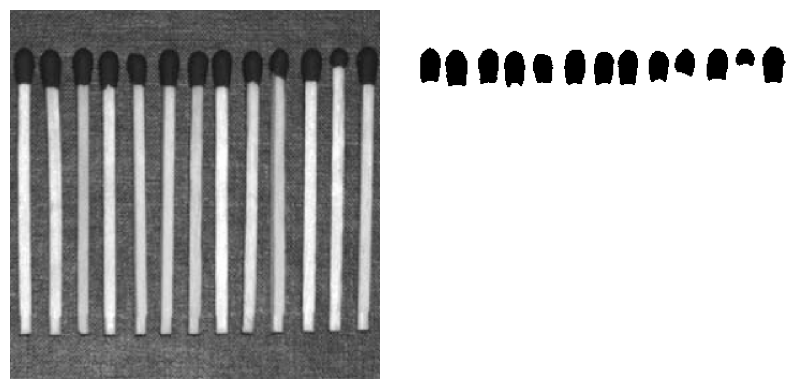

In [4]:
import cv2
import numpy as np

image = cv2.imread(r"Images\matches.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_value = 50
max_value = 255

blur = cv2.GaussianBlur(gray_image, (5,5), cv2.BORDER_DEFAULT)

_, binary_image = cv2.threshold(blur, threshold_value, max_value, cv2.THRESH_BINARY)

show_2figures(image, binary_image)

#### Como podemos apenas alterar a cabeça dos fósforos para branco, mantendo o resto da imagem original?

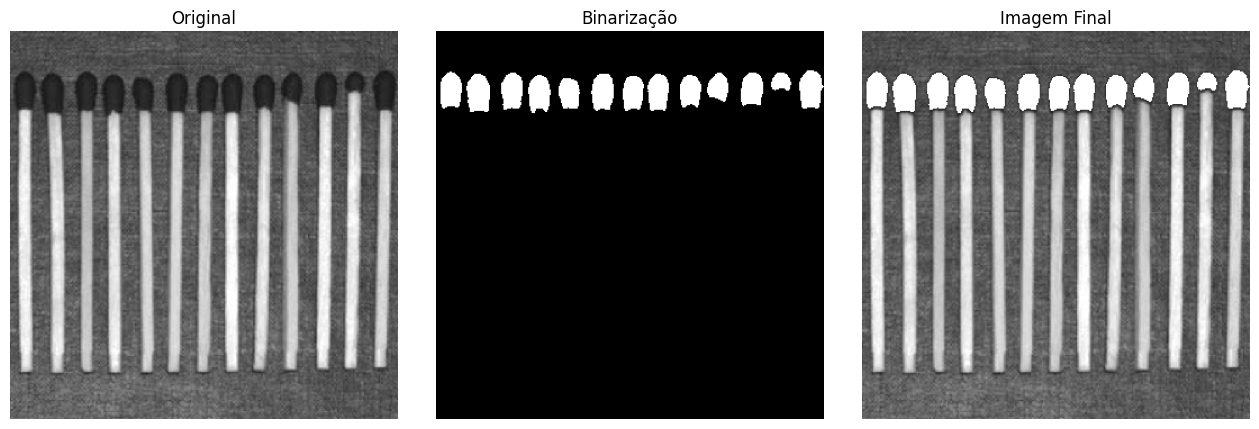

In [7]:
import cv2
import numpy as np

image = cv2.imread(r"Images\matches.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_value = 50
max_value = 255

blur = cv2.GaussianBlur(gray_image, (5,5), cv2.BORDER_DEFAULT)

_, binary_image = cv2.threshold(blur, threshold_value, max_value, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

final_image = cv2.bitwise_or(binary_image, gray_image)

show_3figures(image, binary_image, final_image, 'Original', 'Binarização', 'Imagem Final')